In [19]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def resize(img,scale=0.75):   
    width = int(img.shape[1] * scale )
    height = int(img.shape[0] * scale )
    dim = (width,height)
    return cv2.resize(img,dim, cv2.INTER_AREA)

def getContours(img):
    contours,hierarchy = cv2.findContours(img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    hsv = cv2.cvtColor(imgcontour, cv2.COLOR_BGR2HSV)   # converting to HSV color space

    
    green_mask = cv2.inRange(hsv, (36,25,25),(70,255,255))  # green color range
    yellow_mask = cv2.inRange(hsv, (22,93,100),(45,255,255)) # yellow color range
    

    for cnt in contours:
        peri = cv2.arcLength(cnt,True)   #perimeter
        area = cv2.contourArea(cnt)      # Area
        
        if  peri >70 and area >100 :
            # cv2.drawContours(imgcontour,cnt,-1,(255,0,0),3)
            g = green_mask[cnt].mean()
            y = yellow_mask[cnt].mean()
            
            threshold = g/(g+y)
                
            if threshold > 0.7:
                objText = "Fresh Leaf"
            else:
                objText = "Old leaf"
            approx = cv2.approxPolyDP(cnt,0.02*peri,True) 
            x,y,w,h = cv2.boundingRect(approx)
            cv2.rectangle(imgcontour,(x,y),(x+w,y+h),(0,255,0),2)   # Drawing Rectangle
            cv2.putText(imgcontour,objText,(x,y), cv2.FONT_HERSHEY_COMPLEX,0.5,(255,0,0),1)  # Put Text
      

    
img = cv2.imread("image.jpg")  
img = resize(img)  # resizing image


imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # converting to gray image


imgblur = cv2.bilateralFilter(imgGray,3,25,25)  # removing noise without blurring edges
lap = cv2.Laplacian(imgblur,cv2.CV_64F) # Laplacian edge detection

lap = np.uint8(np.absolute(lap)) 
imgcontour = img.copy()
getContours(lap)
cv2.imshow("image",imgcontour)
cv2.imwrite("Output.jpg",imgcontour)   # Saving Image
cv2.waitKey(0)
cv2.destroyAllWindows()


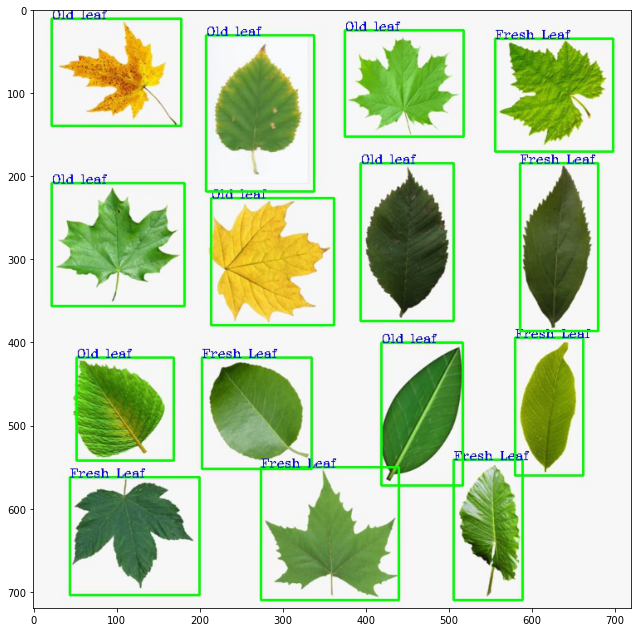

In [20]:
img = plt.imread("Output.jpg")
plt.figure(figsize=(17,11))
plt.imshow(img)